In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 10s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3742168238_d961937e68_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/22325299158_6e32e599f8_m.jpg')]

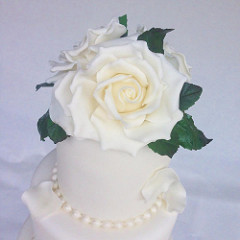

In [8]:
PIL.Image.open(str(roses[1]))

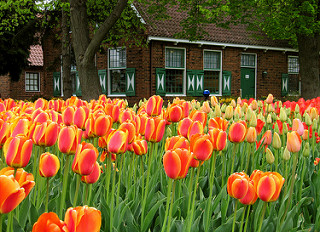

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3742168238_d961937e68_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/22325299158_6e32e599f8_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train=X_train/255
X_test=X_test/255

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 14s 21ms/step - loss: 1.2540 - accuracy: 0.4709
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 0.9061 - accuracy: 0.6508
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.7018 - accuracy: 0.7442
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.5027 - accuracy: 0.8143
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.3075 - accuracy: 0.8950
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1797 - accuracy: 0.9437
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1153 - accuracy: 0.9698
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0556 - accuracy: 0.9851
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0303 - accuracy: 0.9909
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0097 - accuracy: 0.9993
Epoch 11

In [24]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 2.6140 - accuracy: 0.6688


[2.6139721870422363, 0.6688452959060669]

In [25]:
#applying Data augmentation...

In [26]:
img_height=img_width=180
data_augmentation=keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                     input_shape=(img_height,img_width,3)),
     
         layers.experimental.preprocessing.RandomRotation(0.1),
         layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

In [27]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 5s 29ms/step - loss: 1.4476 - accuracy: 0.3797
Epoch 2/30
86/86 [==============================] - 2s 28ms/step - loss: 1.1404 - accuracy: 0.5222
Epoch 3/30
86/86 [==============================] - 2s 28ms/step - loss: 1.0212 - accuracy: 0.5930
Epoch 4/30
86/86 [==============================] - 3s 30ms/step - loss: 0.9223 - accuracy: 0.6453
Epoch 5/30
86/86 [==============================] - 3s 29ms/step - loss: 0.8550 - accuracy: 0.6708
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8213 - accuracy: 0.6770
Epoch 7/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7897 - accuracy: 0.6966
Epoch 8/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7254 - accuracy: 0.7238
Epoch 9/30
86/86 [==============================] - 3s 30ms/step - loss: 0.6968 - accuracy: 0.7340
Epoch 10/30
86/86 [==============================] - 3s 35ms/step - loss: 0.6896 - accuracy: 0.7391
Epoch 11/

In [28]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 1s 13ms/step - loss: 1.0307 - accuracy: 0.7266


[1.0306651592254639, 0.7265795469284058]

In [29]:
#seeing image after applying data augmentation...

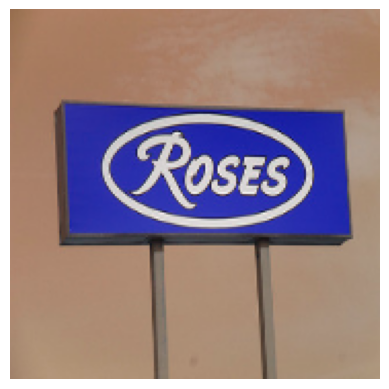

In [33]:
plt.axis('off')
plt.imshow(X[0])

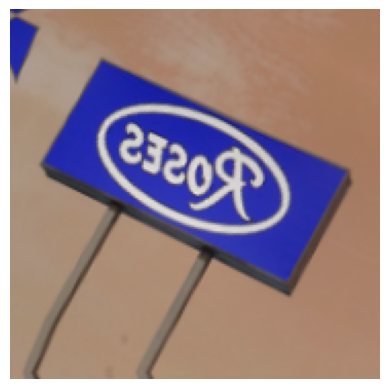

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))